In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
euler=np.genfromtxt('euler.csv',delimiter=',')
euler

array([[ 0.00000000e+00,  9.70543893e-02,  1.08062013e-01, ...,
        -1.53340512e+02, -1.53088089e+02, -1.53230348e+02],
       [ 0.00000000e+00, -2.30267980e+00, -4.11040907e+00, ...,
        -6.28467690e+00, -6.57603500e+00, -6.52817305e+00],
       [ 0.00000000e+00, -1.70092421e+00, -3.12300802e+00, ...,
        -9.70631622e+01, -9.67409801e+01, -9.67698235e+01]])

In [3]:
phi,theta,psi=0,0,0
sensor=np.genfromtxt('sensor.csv',delimiter=',')

In [4]:
sensor

array([[ 2.62939453e-01, -4.99755859e-01,  8.34472656e-01,
        -8.79326188e-03,  5.59571211e-03, -1.06584992e-03],
       [ 2.69531250e-01, -4.91699219e-01,  8.43750000e-01,
        -9.19295560e-03,  5.86217459e-03, -6.66156203e-04],
       [ 2.53662109e-01, -5.02685547e-01,  8.42773438e-01,
        -8.26033692e-03,  5.86217459e-03, -1.46554365e-03],
       ...,
       [ 2.58056641e-01, -4.92187500e-01,  8.36181641e-01,
        -7.59418071e-03,  6.12863707e-03, -1.06584992e-03],
       [ 2.62695312e-01, -4.91210938e-01,  8.35693359e-01,
        -9.05972436e-03,  5.46248087e-03, -9.32618684e-04],
       [ 2.60498047e-01, -4.92919922e-01,  8.40332031e-01,
        -9.05972436e-03,  5.72894335e-03, -9.32618684e-04]])

In [5]:
accel=scipy.io.loadmat('ArsAccel.mat')
gyro=scipy.io.loadmat('ArsGyro.mat')

In [6]:
gyro

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Thu Feb 25 10:20:01 2010',
 '__version__': '1.0',
 '__globals__': [],
 'wx': array([[ 0.00015978],
        [ 0.00015978],
        [ 0.00319579],
        ...,
        [ 0.00063916],
        [-0.00431431],
        [-0.00639159]]),
 'wy': array([[ 0.00223706],
        [ 0.00319579],
        [-0.00095874],
        ...,
        [ 0.00319579],
        [ 0.006072  ],
        [ 0.00319579]]),
 'wz': array([[ 0.0014381 ],
        [-0.00335559],
        [-0.00191747],
        ...,
        [ 0.00527306],
        [-0.00047937],
        [ 0.00127831]])}

In [7]:
ax,ay,az=accel['fx'],accel['fy'],accel['fz']
gx,gy,gz=gyro['wx'],gyro['wy'],gyro['wz']
accel['fx','fy']

KeyError: ('fx', 'fy')

In [ ]:
np.hstack([ax,ay,az,gx,gy,gz])[0]

array([ 3.90285000e-02, -4.44116400e-02,  2.91640356e+00,  1.59784893e-04,
        2.23705832e-03,  1.43809894e-03])

In [ ]:
max(gyro['wx'])

array([0.69268819])

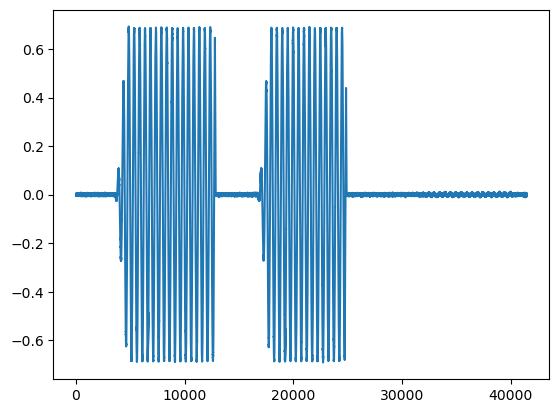

In [ ]:
plt.plot(gyro['wx'])

In [ ]:
accel['fx'][0]

array([0.0390285])

In [ ]:
 np.array([Gx,Gy,Gz]).T

array([[ 0.00015978,  0.00319579, -0.00335559]])

In [ ]:
quats=np.array([0,0,0,0]).reshape(1,4)
phi_prev,theta_prev,psi_prev=0,0,0
phis=[0]
dt=0.01

for i in range(len(gyro['wx'])):
    Ax,Ay,Az,Gx,Gy,Gz=accel['fx'][i],accel['fy'][i],accel['fz'][i],gyro['wx'][i],gyro['wy'][i],gyro['wz'][i]
    phi,theta,psi=np.array([[1,np.sin(phi)*np.tan(theta),np.cos(phi)*np.tan(theta)],
                            [0,np.cos(phi),-np.sin(phi)],
                         [0,np.sin(phi)/np.cos(theta),np.cos(phi)/np.cos(theta)]])@np.vstack([Gx,Gy,Gz])[:,0]*dt+np.hstack([phi_prev,theta_prev,psi_prev])
    phi_prev,theta_prev,psi_prev=phi,theta,psi
    phis.append(phi*180/np.pi)
    cosphi=np.cos(phi/2)
    costhe=np.cos(theta/2)
    cospsi=np.cos(psi/2)
    sinphi=np.sin(phi/2)
    sinthe=np.sin(theta/2)
    sinpsi=np.sin(psi/2)

    z=np.array([
        [cosphi*costhe*cospsi+sinphi*sinthe*sinpsi],
        [sinphi*costhe*cospsi-cosphi*sinthe*sinpsi],
        [cosphi*sinthe*cospsi+sinphi*costhe*sinpsi],
        [cosphi*costhe*sinpsi-sinphi*sinthe*cospsi]
    ]).reshape(1,4)
    quats=np.append(quats,z,axis=0)

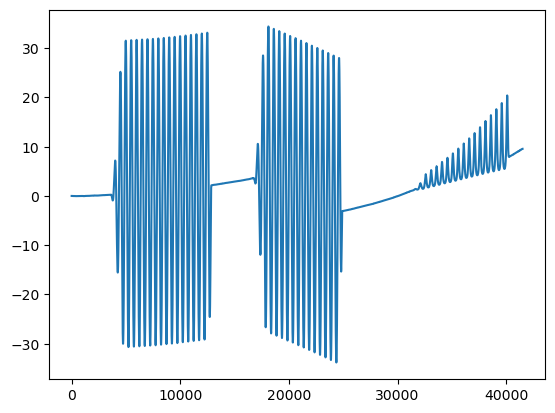

In [ ]:
plt.plot(phis)

plt.show()

In [ ]:
phi

array([0.00015978, 0.00223706, 0.0014381 ])

In [ ]:
q,w,e=a[:,0]
q

0.00015978489302008087

In [ ]:
np.vstack([Gx,Gy,Gz]).shape
phi

array([0.00015978])

In [ ]:
z=np.array([
        [cosphi*costhe*cospsi+sinphi*sinthe*sinpsi],
        [sinphi*costhe*cospsi-cosphi*sinthe*sinpsi],
        [cosphi*sinthe*cospsi+sinphi*costhe*sinpsi],
        [cosphi*costhe*sinpsi-sinphi*sinthe*cospsi]
    ])

In [ ]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))


In [ ]:
from scipy.spatial.transform import Rotation as R

In [ ]:
a,b=R.align_vectors(np.array([0,0,1]).reshape(1,3),np.average(sensor[:10][:,:3],axis=0).reshape(1,3))

/var/folders/7m/lpd7135d55d7t005dw41hthr0000gn/T/ipykernel_5768/2127739296.py:1: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  a,b=R.align_vectors(np.array([0,0,1]).reshape(1,3),np.average(sensor[:10][:,:3],axis=0).reshape(1,3))


In [ ]:
np.average(sensor[:10][:,:3],axis=0

array([ 0.26027832, -0.49501953,  0.83925781])

In [ ]:
mod_sensor=a.apply(sensor[:,:3])
mod_sensor=mod_sensor/np.linalg.norm(mod_sensor,axis=1).reshape(600,1)*9.81

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(np.array([accel['fx'],accel['fy'],accel['fz']]).T[0])

,0,1,2
0,0.039029,-0.044412,2.916404
1,0.022879,-0.005383,2.927170
2,0.044412,-0.039029,2.932553
3,0.012113,-0.021533,2.927170
4,0.033645,-0.049795,2.937936
...,...,...,...
41495,0.032299,-0.039029,2.894871
41496,0.028262,0.004037,2.893524
41497,0.022879,-0.021533,2.911020
41498,0.032299,-0.055178,2.884105


In [8]:
acc_angles=[]
for i in range(len(sensor)):
    Ax,Ay,Az,Gx,Gy,Gz=sensor[i]
    theta=np.arctan(Ay/Az)
    phi=np.arctan(Ax/np.sqrt(Ay**2+Az**2))
    psi=0
    acc_angles.append([theta,phi,psi])

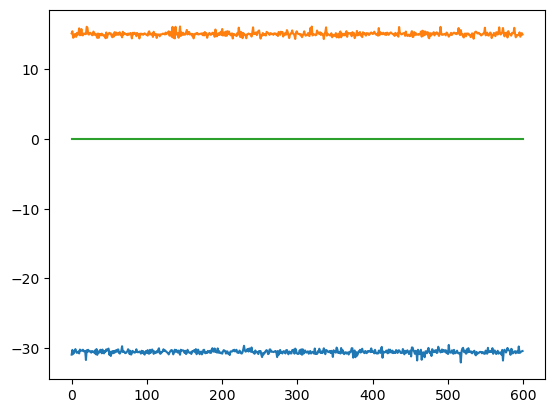

In [12]:
plt.plot(np.rad2deg(acc_angles))